# Desafio Lighthouse
## Contexto
Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para estatística
import scipy.stats as stats

## Análise Exploratória dos dados (EDA)

In [2]:
# importando o dataset
df_movies = pd.read_csv("desafio_indicium_imdb.csv")
df_movies

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [3]:
# Verifica informações do DataFrame
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


### Limpeza do dataset

Após a verificação das informações básicas do dataset a ser utilizado é necessário realizar uma limpeza para a remoção de valores nulos ou indesejados para o propósito da análise. Também é importante padronizar os dados a serem utilizados adequando os tipos das variáveis e os nomes das mesmas.

In [4]:
# Removendo o índice
df_movies.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
# Ano do lançamento
df_movies["Released_Year"] = df_movies["Released_Year"].str.extract(r"(\d{4})").astype(float)

In [6]:
# Converter runtime
df_movies["Runtime"] = df_movies["Runtime"].str.replace(" min", "").astype(float)

In [7]:
# Converter gross para numérico
df_movies["Gross"] = df_movies["Gross"].str.replace(",", "").astype(float)

In [8]:
# Criar década
df_movies["Decade"] = (df_movies["Released_Year"] // 10 * 10).astype("Int64")

In [9]:
# Separar gêneros
df_movies["Genre_list"] = df_movies["Genre"].str.split(", ")
df_movies["Main_Genre"] = df_movies["Genre_list"].str[0]

In [11]:
# Visualizando o dataset com as alterações
df_movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,Genre_list,Main_Genre
0,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,1970,"[Crime, Drama]",Crime
1,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,2000,"[Action, Crime, Drama]",Action
2,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,1970,"[Crime, Drama]",Crime
3,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,1950,"[Crime, Drama]",Crime
4,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,2000,"[Action, Adventure, Drama]",Action


In [12]:
# Quantidade de Linhas e Colunas do dataframe
df_movies.shape

(999, 18)

Checando a quantidade de valores ausentes:

In [13]:
ausentes = df_movies.isnull().sum().sort_values(ascending=False)
ausentes = ausentes[ausentes > 0]
ausentes

,0
Gross,169
Meta_score,157
Certificate,101
Released_Year,1
Decade,1


## Checando informações básicas do dataset

In [14]:
# Parâmetros estatísticos do dataset
df_movies.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Released_Year,998.0,1991.214429,23.308539,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime,999.0,122.871872,28.101227,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,999.0,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0
Gross,830.0,68082574.104819,109807553.385723,1305.0,3245338.5,23457439.5,80876340.25,936662225.0
Decade,998.0,1986.583166,23.200504,1920.0,1970.0,1990.0,2000.0,2020.0


## Analisando parâmetros relevantes

### Maiores diretores

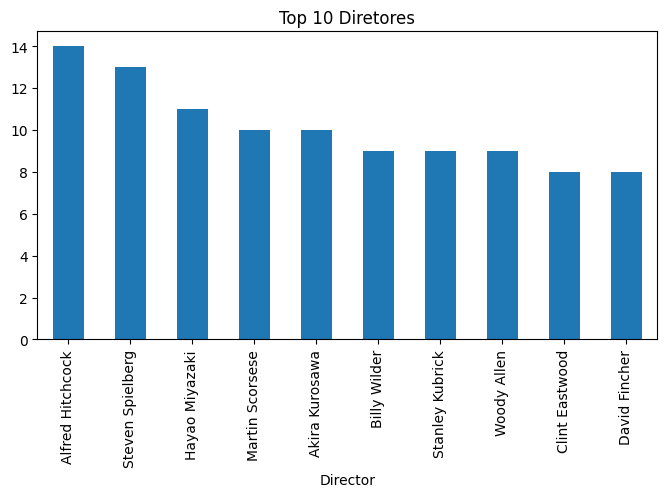

In [15]:
# Contando a quantidade de vezes que cada diretor aparece
df_movies["Director"].value_counts().head(10).plot(kind="bar", figsize=(8,4), title="Top 10 Diretores")
plt.show()

Tem-se que o diretor que mais aparece nos filmes presentes no dataset é **Alfred Hitchcock**

### Genêros mais famosos

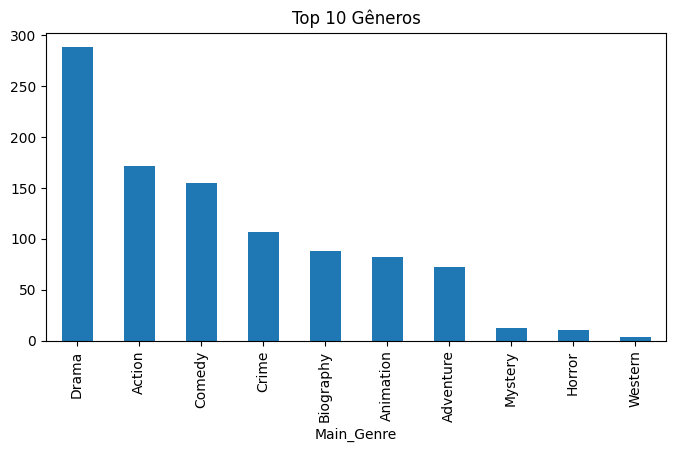

In [16]:
# Contando a quantidade de vezes que cada gênero aparece como principal em um filme
df_movies["Main_Genre"].value_counts().head(10).plot(kind="bar", figsize=(8,4), title="Top 10 Gêneros")
plt.show()

O gênero mais comum de filme apresentado no dataset é **Drama**

### Estrelas



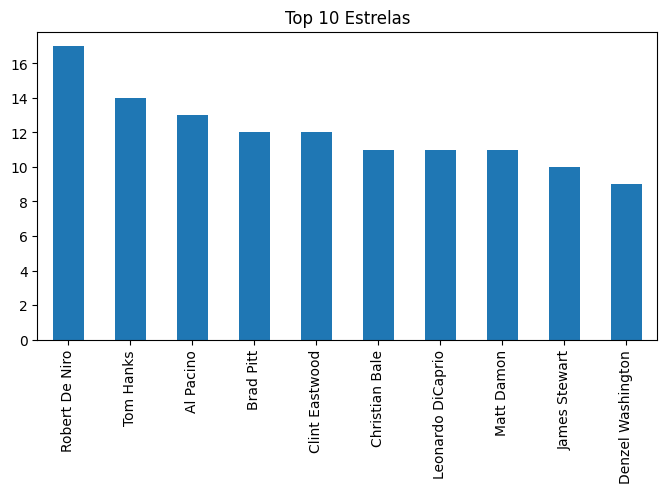

In [17]:
# Contando as aparições dos atores em star 1, 2, 3 e 4
stars = pd.concat([df_movies[c] for c in ["Star1","Star2","Star3","Star4"]])
stars.value_counts().head(10).plot(kind="bar", figsize=(8,4), title="Top 10 Estrelas")
plt.show()

O ator que mais aparece nos filmes presentes no dataset é **Robert De Niro**

### Certificados

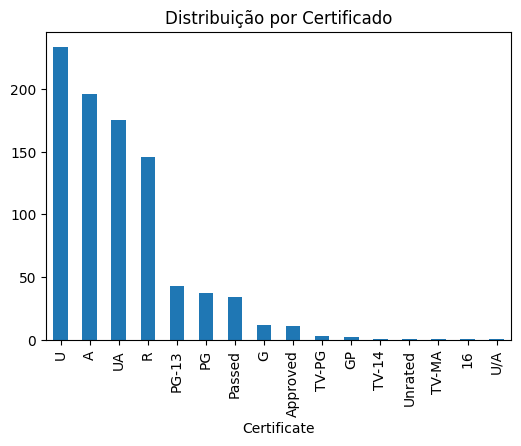

In [18]:
# Contando a quantidade de vezes que cada certificado aparece
df_movies["Certificate"].value_counts().plot(kind="bar", figsize=(6,4), title="Distribuição por Certificado")
plt.show()

O certificado que mais aparece é o **U** (Distribuição irrestrita)

### Distribuições

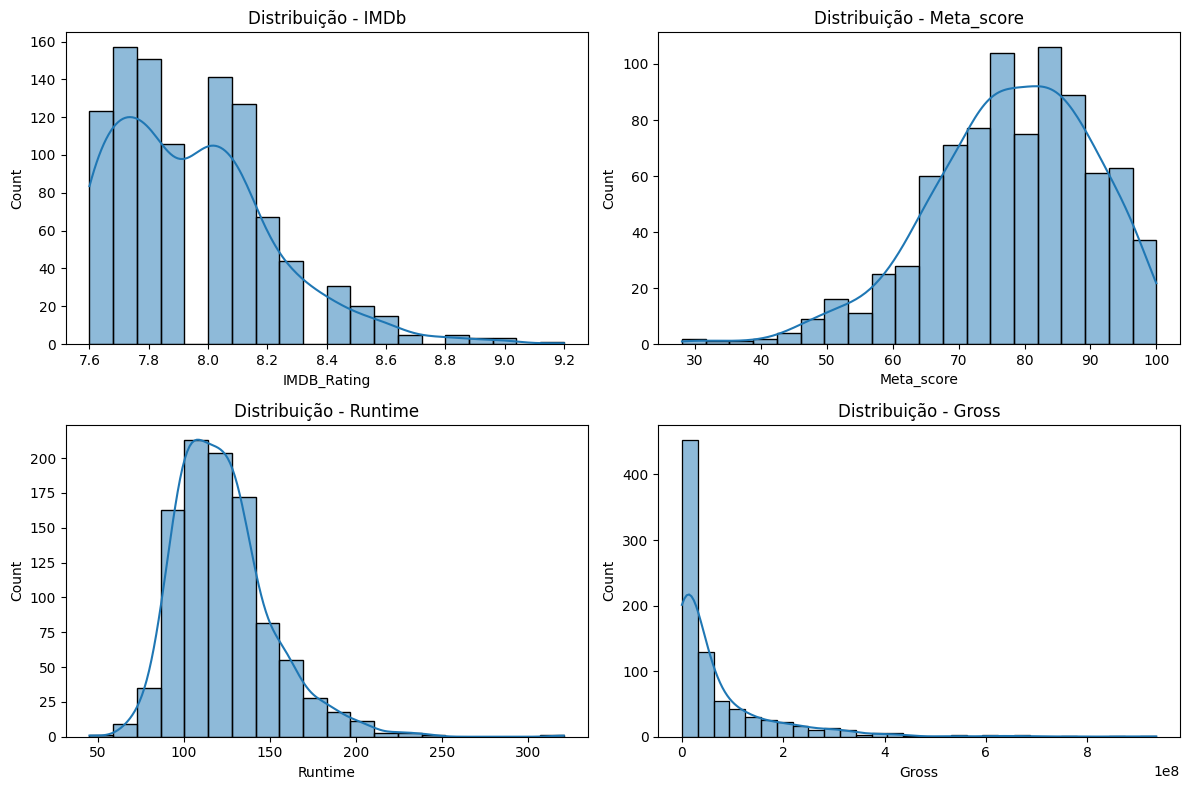

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(df_movies["IMDB_Rating"], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribuição - IMDb")

sns.histplot(df_movies["Meta_score"].dropna(), bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribuição - Meta_score")

sns.histplot(df_movies["Runtime"].dropna(), bins=20, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribuição - Runtime")

sns.histplot(df_movies["Gross"].dropna(), bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribuição - Gross")

plt.tight_layout()
plt.show()

## Matriz de Correlação

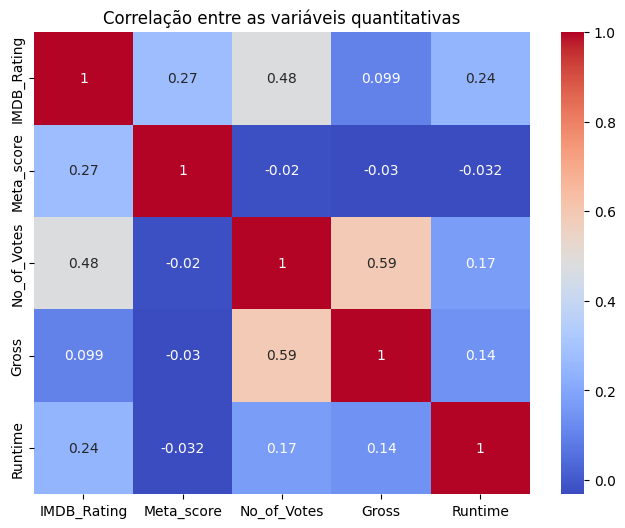

In [21]:
corr = df_movies[["IMDB_Rating","Meta_score","No_of_Votes","Gross","Runtime"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre as variáveis quantitativas")
plt.show()

## Dispersões

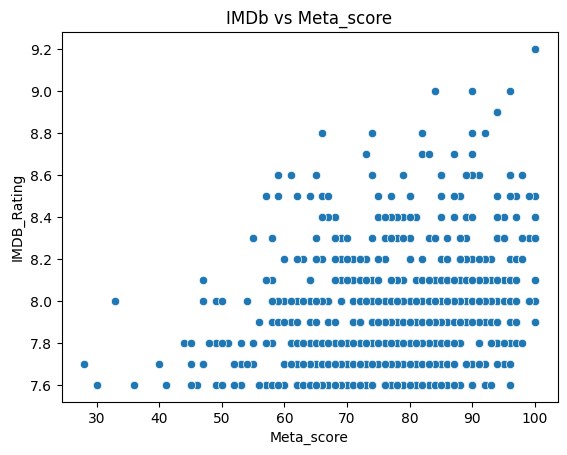

In [22]:
sns.scatterplot(x="Meta_score", y="IMDB_Rating", data=df_movies)
plt.title("IMDb vs Meta_score")
plt.show()

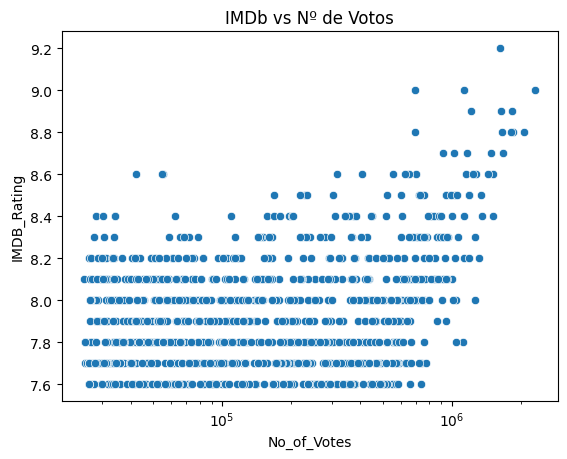

In [23]:
sns.scatterplot(x="No_of_Votes", y="IMDB_Rating", data=df_movies)
plt.xscale("log")
plt.title("IMDb vs Nº de Votos")
plt.show()

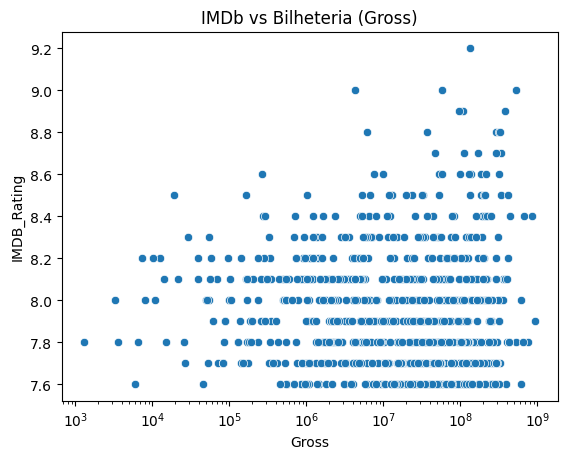

In [25]:
sns.scatterplot(x="Gross", y="IMDB_Rating", data=df_movies)
plt.xscale("log")
plt.title("IMDb vs Bilheteria (Gross)")
plt.show()

Boxplot

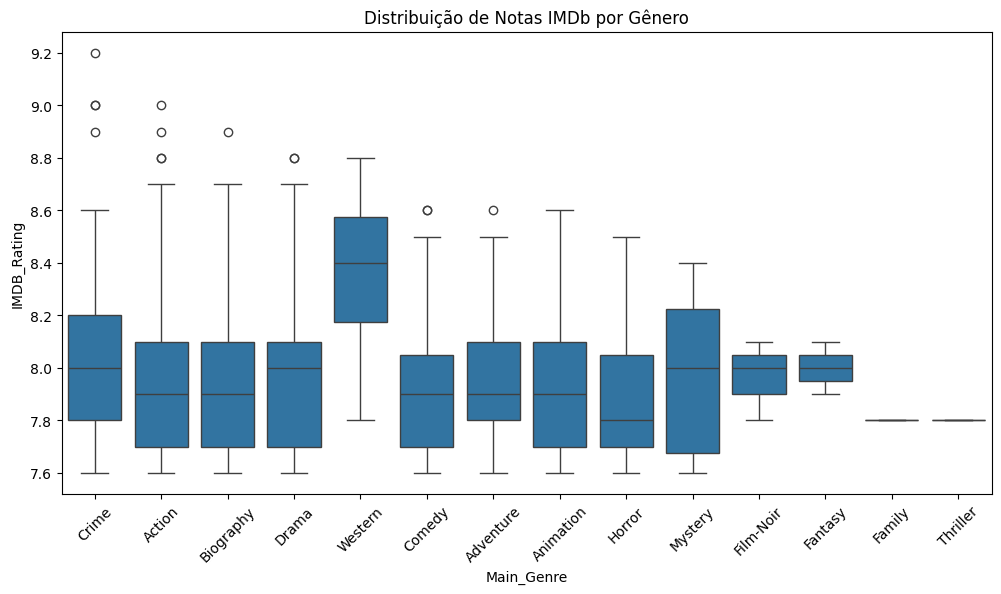

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Main_Genre", y="IMDB_Rating", data=df_movies)
plt.xticks(rotation=45)
plt.title("Distribuição de Notas IMDb por Gênero")
plt.show()

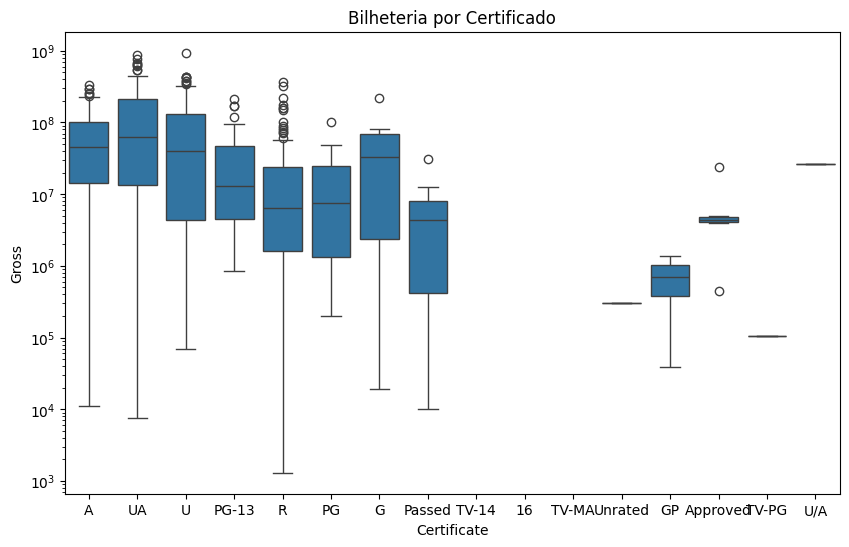

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Certificate", y="Gross", data=df_movies)
plt.yscale("log")
plt.title("Bilheteria por Certificado")
plt.show()

## Análises Temporais

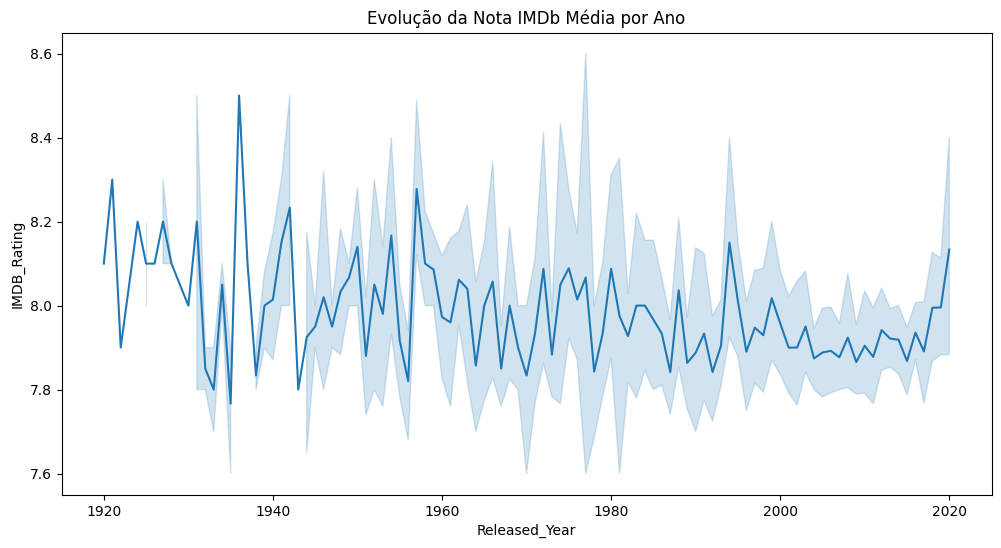

In [29]:
# IMDb médio por ano
plt.figure(figsize=(12,6))
sns.lineplot(x="Released_Year", y="IMDB_Rating", data=df_movies, estimator="mean")
plt.title("Evolução da Nota IMDb Média por Ano")
plt.show()

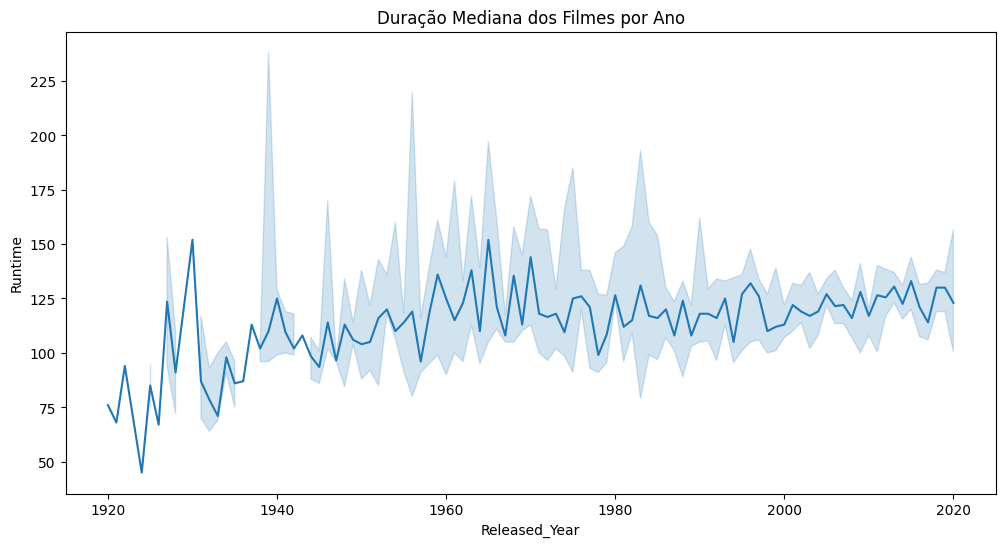

In [31]:
# Runtime mediano por ano
plt.figure(figsize=(12,6))
sns.lineplot(x="Released_Year", y="Runtime", data=df_movies, estimator="median")
plt.title("Duração Mediana dos Filmes por Ano")
plt.show()

##  Respondendo algumas perguntas

### Qual filme você recomendaria para uma pessoa que você não conhece?

In [32]:
# Critério: melhor relação entre nota e número de votos
df_movies["score_popularidade"] = df_movies["IMDB_Rating"] * np.log1p(df_movies["No_of_Votes"])

# Selecionar top 5 filmes
top_recomendados = df_movies.sort_values("score_popularidade", ascending=False).head(5)
print(top_recomendados[["Series_Title", "IMDB_Rating", "No_of_Votes", "Meta_score"]])

                                    Series_Title  IMDB_Rating  No_of_Votes  \
1                                The Dark Knight          9.0      2303232   
0                                  The Godfather          9.2      1620367   
5                                   Pulp Fiction          8.9      1826188   
7                                      Inception          8.8      2067042   
4  The Lord of the Rings: The Return of the King          8.9      1642758   

   Meta_score  
1        84.0  
0       100.0  
5        94.0  
7        74.0  
4        94.0  


Recomendaria The Dark Knight, já que o mesmo aparece no topo do ranking quando considera-se qualidade (nota) e popularidade (número de votos).

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Analisando a matriz de correlação tem-se que os principais fatores relacionados a alta expectativa de faturamento de um filme são:
* o número de votos (No_of_votes): provavelmente relacionado a uma alta bilheteria;
* e a duração do filme, com uma correlação be menor que a anterior.

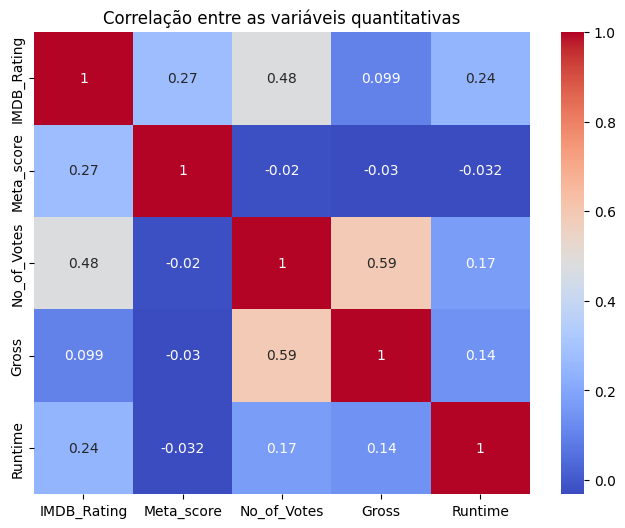

In [34]:
corr = df_movies[["IMDB_Rating","Meta_score","No_of_Votes","Gross","Runtime"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre as variáveis quantitativas")
plt.show()

### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Pela coluna overview pode-se identificar palavras-chaves que podem revelar o gênero ou o tema do filme. Palavras como police, fight e war remetem a filmes de ação.

Também pode-se analisar a tonalidade do texto que varia dependendo do tema do filme.


In [35]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
# Remover stopwords do inglês
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [36]:
# Função para limpar texto
def limpar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'[^a-z\s]', '', texto)  # mantém só letras
    palavras = [w for w in texto.split() if w not in ENGLISH_STOP_WORDS]
    return " ".join(palavras)

df_movies['Overview_clean'] = df_movies['Overview'].apply(limpar_texto)

print(df_movies[['Series_Title', 'Overview', 'Overview_clean']].head(3))

             Series_Title                                           Overview  \
0           The Godfather  An organized crime dynasty's aging patriarch t...   
1         The Dark Knight  When the menace known as the Joker wreaks havo...   
2  The Godfather: Part II  The early life and career of Vito Corleone in ...   

                                      Overview_clean  
0  organized crime dynastys aging patriarch trans...  
1  menace known joker wreaks havoc chaos people g...  
2  early life career vito corleone s new york cit...  


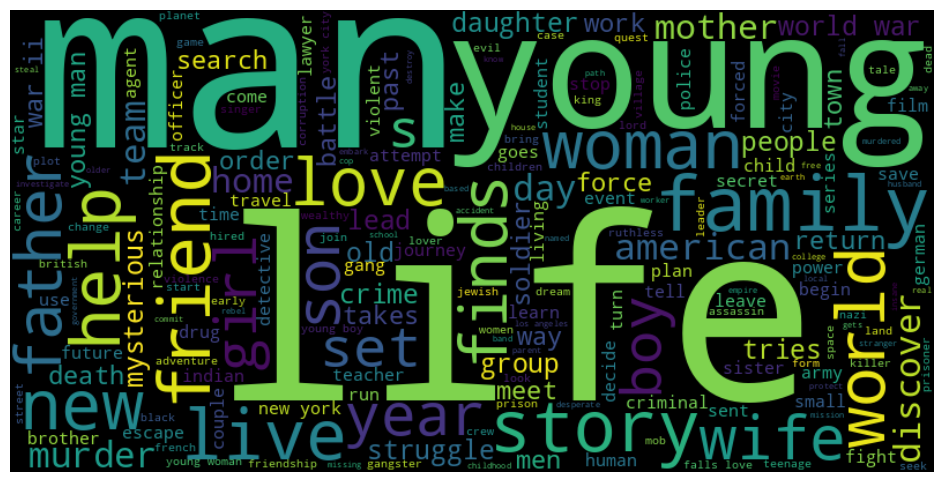

In [37]:
# Concatenar todos os textos
texto_total = " ".join(df_movies['Overview_clean'])

# Gerar WordCloud
wc = WordCloud(width=800, height=400, background_color="black").generate(texto_total)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
palavras = " ".join(df_movies['Overview_clean']).split()
contagem = Counter(palavras)

print("Top 20 palavras mais comuns:")
print(contagem.most_common(20))

Top 20 palavras mais comuns:
[('young', 132), ('man', 110), ('life', 101), ('world', 78), ('new', 72), ('story', 63), ('war', 61), ('love', 61), ('woman', 60), ('family', 59), ('finds', 47), ('help', 45), ('boy', 42), ('friends', 41), ('girl', 39), ('son', 38), ('years', 38), ('s', 34), ('lives', 33), ('wife', 33)]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Vetorização TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_text = tfidf.fit_transform(df_movies['Overview_clean'])

# Target: gênero principal
y_genre = df_movies['Main_Genre']

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_text, y_genre, test_size=0.2, random_state=42)

# Modelo simples
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Action       0.38      0.16      0.23        31
   Adventure       0.00      0.00      0.00        15
   Animation       0.00      0.00      0.00        18
   Biography       0.00      0.00      0.00        18
      Comedy       0.50      0.04      0.07        28
       Crime       1.00      0.04      0.08        23
       Drama       0.33      0.98      0.50        62
      Horror       0.00      0.00      0.00         3
     Mystery       0.00      0.00      0.00         2

    accuracy                           0.34       200
   macro avg       0.25      0.14      0.10       200
weighted avg       0.35      0.34      0.21       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Previsão da nota de um filme a partir de dados
Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Para prever a nota de um filme a partir de dados utiliza-se um modelo de regressão já que se procura prever um valor númerico contínuo e específico.
O RMSE (Root Mean Squared Error) foi utilizado como métrica principal — é natural para regressão contínua e penaliza erros grandes (útil quando queremos evitar predições muito fora da realidade).

### Modelo

In [40]:
#bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np

In [43]:
# Seleção de variáveis
features = ["Released_Year", "Certificate", "Runtime", "Genre",
"Meta_score", "No_of_Votes", "Gross"]
X = df_movies[features].copy()
y = df_movies["IMDB_Rating"]

In [44]:
# Definir colunas categóricas e numéricas
cat_cols = ["Certificate", "Genre"]
num_cols = ["Released_Year", "Runtime", "Meta_score"]
log_cols = ["No_of_Votes", "Gross"]

In [45]:
# Transformador log (com +1 para evitar log(0))
log_transformer = FunctionTransformer(lambda x: np.log1p(x))

In [46]:
# Preprocessamento
preprocessor = ColumnTransformer([
("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
("num", "passthrough", num_cols),
("log", log_transformer, log_cols)
])

In [47]:
# Modelo
model = Pipeline([
("preprocessor", preprocessor),
("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

In [48]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.impute import SimpleImputer

# Atualizar o preprocessor para lidar com NaNs
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols),
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
    ]), num_cols),
    ("log", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("log", FunctionTransformer(lambda x: np.log1p(x)))
    ]), log_cols)
])

In [50]:
X = df_movies[features].dropna()
y = df_movies.loc[X.index, "IMDB_Rating"]

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Identifica colunas numéricas e categóricas
num_cols = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
cat_cols = ['Certificate', 'Genre', 'Genre']

# Preprocessamento numérico com imputação + log-transform
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessamento categórico com imputação + one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combina transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Pipeline final com RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [59]:
# Treino
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Runtime', 'Meta_score',
                                                   'No_of_Votes', 'Gross']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Certificate', 'Genre',
                                                   'Genre'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [60]:
# Avaliação
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"RMSE (com log-transform): {rmse:.3f}")
print(f"R² (com log-transform): {r2:.3f}")

RMSE (com log-transform): 0.041
R² (com log-transform): 0.382


In [61]:
# Salvar modelo
joblib.dump(model, "LH_CD_Ludmylla.pkl")

['LH_CD_Ludmylla.pkl']

### Previsão da nota de um filme

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
Qual seria a nota do IMDB?

In [65]:
shawShank = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469}

X_new = pd.DataFrame([shawShank])
pred_nota = model.predict(X_new)[0]
print(f"Nota IMDb prevista: {pred_nota:.2f}")

Nota IMDb prevista: 8.75


In [2]:
!pip freeze > requirements.txt